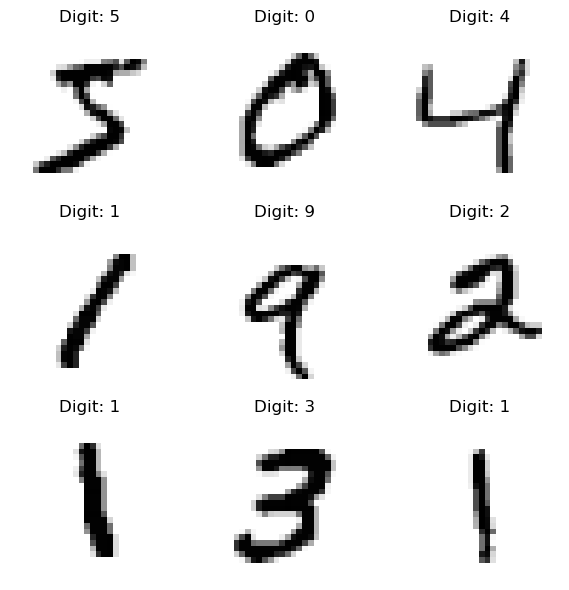

In [20]:
import matplotlib.pyplot as plt
from tensorflow.keras import datasets

# Load the MNIST dataset
(train_digits, train_labels), (test_digits, test_labels) = datasets.mnist.load_data()

# Plot the first 9 images and their labels
fig, axes = plt.subplots(3, 3, figsize=(6, 6))
for i, ax in enumerate(axes.flat):
    ax.imshow(train_digits[i], cmap='binary')
    ax.set_title(f"Digit: {train_labels[i]}")
    ax.set_axis_off()
fig.tight_layout()
plt.show()


In [21]:
import tensorflow as tf

# Reshape the data to add channel dimension required for CNN input
train_digits = train_digits.reshape(-1, 28, 28, 1) / 255.0
test_digits = test_digits.reshape(-1, 28, 28, 1) / 255.0

# Normalize pixel values
train_digits = train_digits / 255.0
test_digits = test_digits / 255.0

# Ensure labels are one-hot encoded
train_labels = tf.keras.utils.to_categorical(train_labels, 10)
test_labels = tf.keras.utils.to_categorical(test_labels, 10)


In [22]:
from tensorflow.keras import layers, models

# Build the CNN model
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

# Show the model summary
model.summary()


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 13, 13, 32)        0         
 g2D)                                                            
                                                                 
 flatten_2 (Flatten)         (None, 5408)              0         
                                                                 
 dense_4 (Dense)             (None, 64)                346176    
                                                                 
 dense_5 (Dense)             (None, 10)                650       
                                                                 
Total params: 347146 (1.32 MB)
Trainable params: 347146 (1.32 MB)
Non-trainable params: 0 (0.00 Byte)
__________________

In [23]:
# Compile the model
model.compile(optimizer='adam',
              loss=tf.keras.losses.CategoricalCrossentropy(),
              metrics=['accuracy'])

# Train the model
history = model.fit(train_digits, train_labels, epochs=12, validation_split=0.2)


Epoch 1/12
1500/1500 [==============================] - 9s 6ms/step - loss: 0.9266 - accuracy: 0.7273 - val_loss: 0.3828 - val_accuracy: 0.8913
Epoch 2/12
1500/1500 [==============================] - 9s 6ms/step - loss: 0.3667 - accuracy: 0.8931 - val_loss: 0.3006 - val_accuracy: 0.9105
Epoch 3/12
1500/1500 [==============================] - 10s 7ms/step - loss: 0.3096 - accuracy: 0.9081 - val_loss: 0.2702 - val_accuracy: 0.9219
Epoch 4/12
1500/1500 [==============================] - 10s 7ms/step - loss: 0.2742 - accuracy: 0.9187 - val_loss: 0.2363 - val_accuracy: 0.9311
Epoch 5/12
1500/1500 [==============================] - 12s 8ms/step - loss: 0.2452 - accuracy: 0.9267 - val_loss: 0.2227 - val_accuracy: 0.9351
Epoch 6/12
1500/1500 [==============================] - 10s 7ms/step - loss: 0.2221 - accuracy: 0.9338 - val_loss: 0.2038 - val_accuracy: 0.9396
Epoch 7/12
1500/1500 [==============================] - 10s 7ms/step - loss: 0.2035 - accuracy: 0.9398 - val_loss: 0.1895 - val_accu

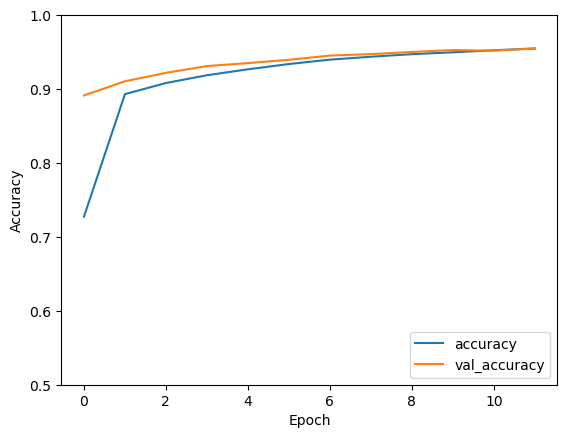

In [24]:
# Plot training history
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')
plt.show()


In [25]:
# Evaluate the model
test_loss, test_acc = model.evaluate(test_digits, test_labels, verbose=2)
print(f"Test accuracy: {test_acc}")


313/313 - 1s - loss: 0.1580 - accuracy: 0.9544 - 633ms/epoch - 2ms/step
Test accuracy: 0.9544000029563904


**Accuracy**
With 10 epochs, my accuracy was .9281
Trying 12 epochs, my accuracy increased to 0.9544. Clearly I can increase accuracy with more epochs. I could also try a different optimizer.